In [41]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import os

In [42]:
file_path = "../Data/Folkhalsomyndigheten_Covid19.xlsx"
df = pd.read_excel(file_path, sheet_name="Veckodata Riket")

## Uppgift 1

## A)

In [43]:
df.head()

,år,veckonummer,Antal_fall_vecka,Antal_fall_100000inv_vecka,Antal_fall_100000inv_14dagar,Kum_antal_fall,Kum_fall_100000inv,Antal_nyaintensivvårdade_vecka,Kum_antal_intensivvårdade,Antal_avlidna_vecka,Antal_avlidna_milj_inv_vecka,Kum_antal_avlidna,Kum_antal_avlidna_milj_inv
0,2020,6,1,0,0,1,0,0,0,0,0.0,0,0.0
1,2020,7,0,0,0,1,0,0,0,0,0.0,0,0.0
2,2020,8,0,0,0,1,0,0,0,0,0.0,0,0.0
3,2020,9,13,0,0,14,0,0,0,0,0.0,0,0.0
4,2020,10,211,2,2,225,2,3,3,0,0.0,0,0.0


In [44]:
print(df.info())

print(df.describe())

print(df.nunique())

print(df.head())

print(df.columns)

print(df.index)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   år                              142 non-null    int64  
 1   veckonummer                     142 non-null    int64  
 2   Antal_fall_vecka                142 non-null    int64  
 3   Antal_fall_100000inv_vecka      142 non-null    int64  
 4   Antal_fall_100000inv_14dagar    142 non-null    int64  
 5   Kum_antal_fall                  142 non-null    int64  
 6   Kum_fall_100000inv              142 non-null    int64  
 7   Antal_nyaintensivvårdade_vecka  142 non-null    int64  
 8   Kum_antal_intensivvårdade       142 non-null    int64  
 9   Antal_avlidna_vecka             142 non-null    int64  
 10  Antal_avlidna_milj_inv_vecka    142 non-null    float64
 11  Kum_antal_avlidna               142 non-null    int64  
 12  Kum_antal_avlidna_milj_inv      142 

## B)

In [45]:
df['Vecka'] = df['år'].astype(str) + 'v' + df['veckonummer'].astype(str)
df

,år,veckonummer,Antal_fall_vecka,Antal_fall_100000inv_vecka,Antal_fall_100000inv_14dagar,Kum_antal_fall,Kum_fall_100000inv,Antal_nyaintensivvårdade_vecka,Kum_antal_intensivvårdade,Antal_avlidna_vecka,Antal_avlidna_milj_inv_vecka,Kum_antal_avlidna,Kum_antal_avlidna_milj_inv,Vecka
0,2020,6,1,0,0,1,0,0,0,0,0.0,0,0.000000,2020v6
1,2020,7,0,0,0,1,0,0,0,0,0.0,0,0.000000,2020v7
2,2020,8,0,0,0,1,0,0,0,0,0.0,0,0.000000,2020v8
3,2020,9,13,0,0,14,0,0,0,0,0.0,0,0.000000,2020v9
4,2020,10,211,2,2,225,2,3,3,0,0.0,0,0.000000,2020v10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,2022,38,4669,45,93,2585507,24910,22,9475,88,8.5,20303,1956.099976,2022v38
138,2022,39,13532,130,175,2599039,25041,15,9490,92,8.9,20395,1965.000000,2022v39
139,2022,40,3999,39,169,2603038,25079,19,9509,88,8.5,20483,1973.400024,2022v40
140,2022,41,3408,33,72,2606446,25112,13,9522,73,7.0,20556,1980.500000,2022v41


## C-F through seaborn

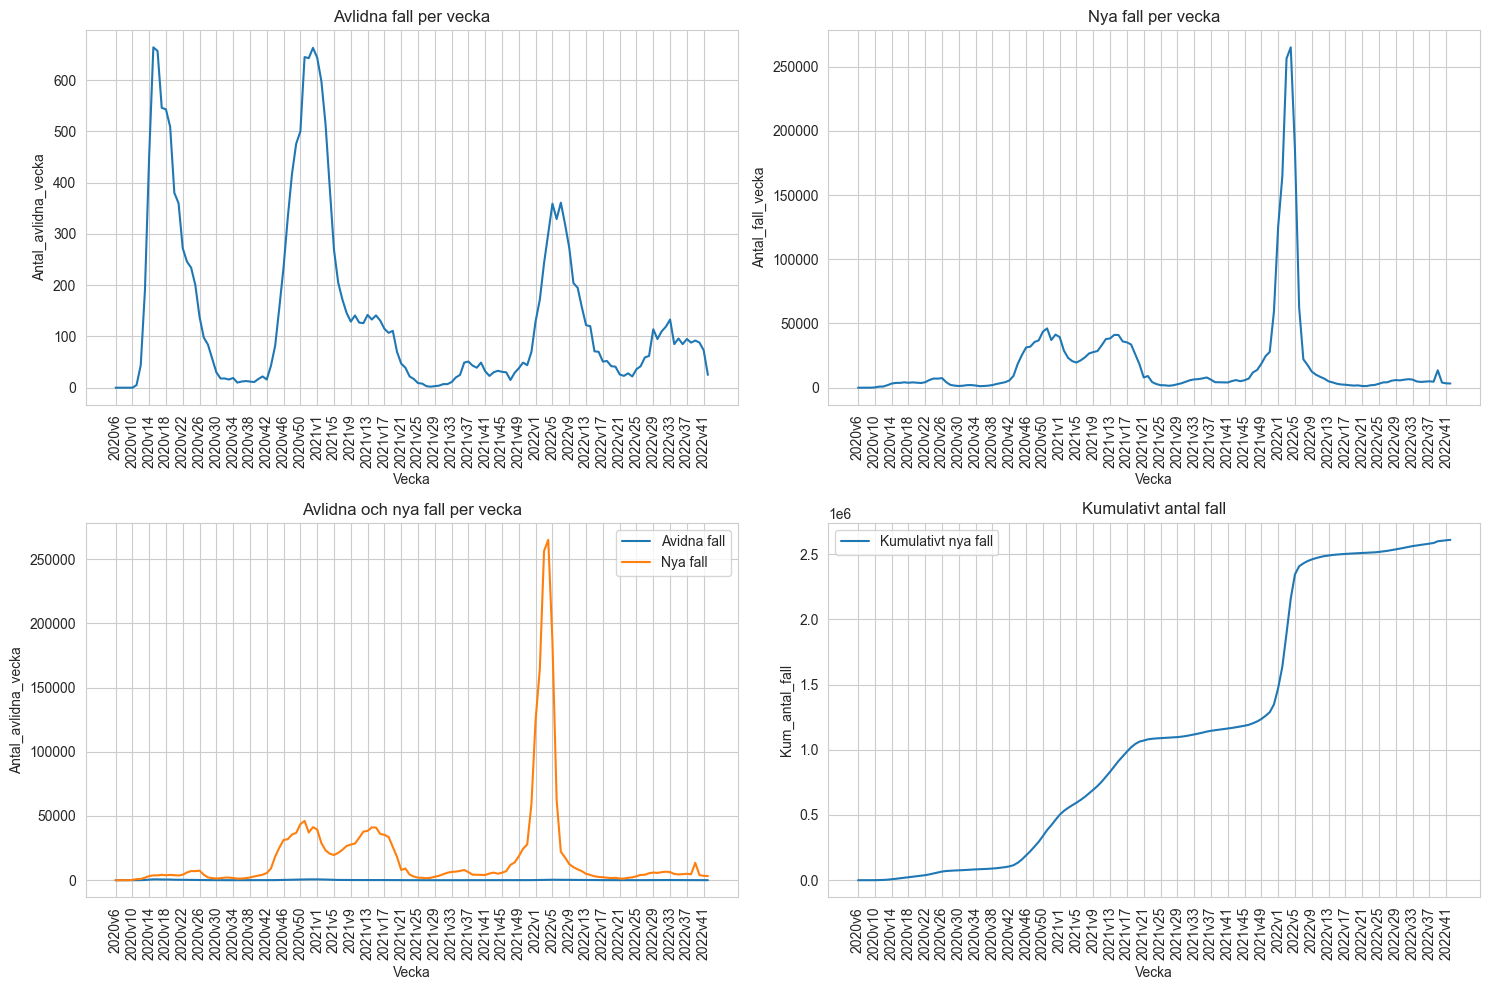

In [46]:
output_folder = 'Visualization'
if not os.path.exists(output_folder):
    os.makedirs(output_folder)
    
sns.set_style("whitegrid")

# Creates a 2x2 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Plot 1: Avlidna fall per vecka
sns.lineplot(x="Vecka", y="Antal_avlidna_vecka", data=df, ax=axes[0, 0])
axes[0, 0].set_title("Avlidna fall per vecka")
axes[0, 0].set_xticks(range(0, len(df['Vecka']), 4))
axes[0, 0].set_xticklabels(df['Vecka'][::4], rotation=90)

# Plot 2: Nya fall per vecka
sns.lineplot(x="Vecka", y="Antal_fall_vecka", data=df, ax=axes[0, 1])
axes[0, 1].set_title("Nya fall per vecka")
axes[0, 1].set_xticks(range(0, len(df['Vecka']), 4))
axes[0, 1].set_xticklabels(df['Vecka'][::4], rotation=90)

# Plot 3: Avlidna och nya fall per vecka
sns.lineplot(x="Vecka", y="Antal_avlidna_vecka", data=df, ax=axes[1, 0], label="Avidna fall")
sns.lineplot(x="Vecka", y="Antal_fall_vecka", data=df, ax=axes[1, 0], label="Nya fall")
axes[1, 0].set_title("Avlidna och nya fall per vecka")
axes[1, 0].legend()
axes[1, 0].set_xticks(range(0, len(df['Vecka']), 4))
axes[1, 0].set_xticklabels(df['Vecka'][::4], rotation=90)

# Plot 4: Kumulativt antal fall
df['Kum_antal_fall'] = df['Antal_fall_vecka'].cumsum()
df['Kum_antal_avlidna'] = df['Antal_avlidna_vecka'].cumsum()
sns.lineplot(x="Vecka", y="Kum_antal_fall", data=df, ax=axes[1, 1], label="Kumulativt nya fall")
axes[1, 1].set_title("Kumulativt antal fall")
axes[1, 1].legend()
axes[1, 1].set_xticks(range(0, len(df['Vecka']), 4))
axes[1, 1].set_xticklabels(df['Vecka'][::4], rotation=90)

for i in range(2):
    for j in range(2):
        plt.savefig(os.path.join(output_folder, f"seaborn_plot_{i}_{j}.png"), bbox_inches='tight', pad_inches=0.1)
        
# Adjusting the layout for better spacing
plt.tight_layout()
plt.show()

## C-F through plotly 

In [47]:
    
    
# plot 1: for avlidna fall per vecka
fig1 = px.line(df, x="Vecka", y="Antal_avlidna_vecka", title="Avlidna fall per vecka")
fig1.update_layout(xaxis=dict(tickangle=90), showlegend=False)

# plot 2: for nya fall per vecka
fig2 = px.line(df, x="Vecka", y="Antal_fall_vecka", title="Nya fall per vecka")
fig2.update_layout(xaxis=dict(tickangle=90), showlegend=False)

# plot 3: for both avlidna and nya fall per vecka
fig3 = px.line(df, x="Vecka", y=["Antal_avlidna_vecka", "Antal_fall_vecka"], title="Avlidna och nya fall per vecka")
fig3.update_layout(xaxis=dict(tickangle=90))

# plot 4: for kumulativt antal fall
df['Kum_antal_fall'] = df['Antal_fall_vecka'].cumsum()
# df['Kum_antal_avlidna'] = df['Antal_avlidna_vecka'].cumsum()
fig4 = px.line(df, x="Vecka", y=["Kum_antal_fall"], title="Kumulativt antal fall")
fig4.update_layout(xaxis=dict(tickangle=90))

fig1.write_html(os.path.join(output_folder, "plotly_plot_1.html"))
fig2.write_html(os.path.join(output_folder, "plotly_plot_2.html"))
fig3.write_html(os.path.join(output_folder, "plotly_plot_3.html"))
fig4.write_html(os.path.join(output_folder, "plotly_plot_4.html"))

fig1.show()
fig2.show()
fig3.show()
fig4.show()

## Uppgift 2

In [1]:
df = pd.read_excel('../Data/Folkhalsomyndigheten_Covid19_Vaccine.xlsx', sheet_name='Vaccinerade kommun och ålder')
df

,Län,Län_namn,Kommun,Kommun_namn,Ålder,Befolkning,Antal minst 1 dos,Antal minst 2 doser,Antal 3 doser,Antal 4 doser,Andel minst 1 dos,Andel minst 2 doser,Andel 3 doser,Andel 4 doser
0,1,Stockholms län,114,Upplands Väsby,12-15,2422,1206,1046,NaN,NaN,0.497936,0.431874,NaN,NaN
1,1,Stockholms län,114,Upplands Väsby,16-17,1203,839,755,NaN,NaN,0.697423,0.627598,NaN,NaN
2,1,Stockholms län,114,Upplands Väsby,18-29,6692,4887,4469,1959.0,NaN,0.730275,0.667812,0.292738,NaN
3,1,Stockholms län,114,Upplands Väsby,30-39,7332,5542,5240,2878.0,NaN,0.755865,0.714675,0.392526,NaN
4,1,Stockholms län,114,Upplands Väsby,40-49,6946,5592,5429,3719.0,NaN,0.805068,0.781601,0.535416,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2895,25,Norrbottens län,2584,Kiruna,50-59,3079,2878,2860,2482.0,NaN,0.934719,0.928873,0.806106,NaN
2896,25,Norrbottens län,2584,Kiruna,60-69,2781,2648,2633,2434.0,NaN,0.952175,0.946782,0.875225,NaN
2897,25,Norrbottens län,2584,Kiruna,70-79,2194,2115,2108,2034.0,1784.0,0.963993,0.960802,0.927074,0.813127
2898,25,Norrbottens län,2584,Kiruna,80-89,1280,1256,1253,1220.0,1091.0,0.981250,0.978906,0.953125,0.852344


['12-15' '16-17' '18-29' '30-39' '40-49' '50-59' '60-69' '70-79' '80-89'
 '90 eller äldre']


In [9]:
# a) How many Counties are reprisented in the dataset?
num_of_counties = df['Län'].nunique()
print(f"a) Total counties: {num_of_counties}")

# b) How many municipality are reprisented in the dataset?
num_of_municipalities = df['Kommun'].nunique()
print(f"b) Number of municipalities: {num_of_municipalities}")

# c) how big is the population reprisanted in the dataset?
total_population = df['Befolkning'].sum()
print(f"c) Total population: {total_population}")

# d) Calculate how many children under the age of 18 there are in Sweden based on the dataset
# total_population_sverige = 10545300 
total_of_kids = df[df['Ålder'].isin(['12-15','16-17'])]['Befolkning'].sum()
print(f"d) Antal barn under 18 år: {total_of_kids}")

a) Total counties: 21
b) Number of municipalities: 290
c) Total population: 9092790
d) Antal barn under 18 år: 745370
